In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import pandas as pd
from scipy.stats import jarque_bera
from statsmodels.tsa.stattools import acf, pacf, q_stat
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import minimize
import seaborn as sns
from scipy import stats

In [2]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'normal'

In [3]:
df = pd.read_excel('/content/Data_for_HW1.xlsx', sheet_name='Sheet1')
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace = True)
df.head()

,Bitcoin Price Index,Bitcoin Price Return
Dates,,
2015-01-01,313.9,-0.009827
2015-01-02,315.1,0.003816
2015-01-03,282.0,-0.110983
2015-01-04,258.8,-0.085852
2015-01-05,273.2,0.054149


In [5]:
"I delete non required dates and check all is ok"
df_project=df.copy()
top = df_project[(df.index < '2021-01-17')].index
df_project.drop(top, inplace=True)
bottom = df_project[(df_project.index > '2025-02-14')].index
df_project.drop(bottom, inplace=True)
print(df_project.head(1))
print(df_project.tail(1))
df_project.describe()

            Bitcoin Price Index  Bitcoin Price Return
Dates                                                
2021-01-17              35903.0             -0.004225
            Bitcoin Price Index  Bitcoin Price Return
Dates                                                
2025-02-14              97504.6              0.009258


,Bitcoin Price Index,Bitcoin Price Return
count,1490.000000,1490.000000
mean,44407.006059,0.000966
std,20993.480456,0.031825
min,15776.200000,-0.156300
25%,27445.805176,-0.013385
50%,41188.416015,-0.000132
75%,58829.750000,0.015406
max,106157.200000,0.178685


In [6]:
df_project.isnull().values.any() #I check no missing or NaN

np.False_

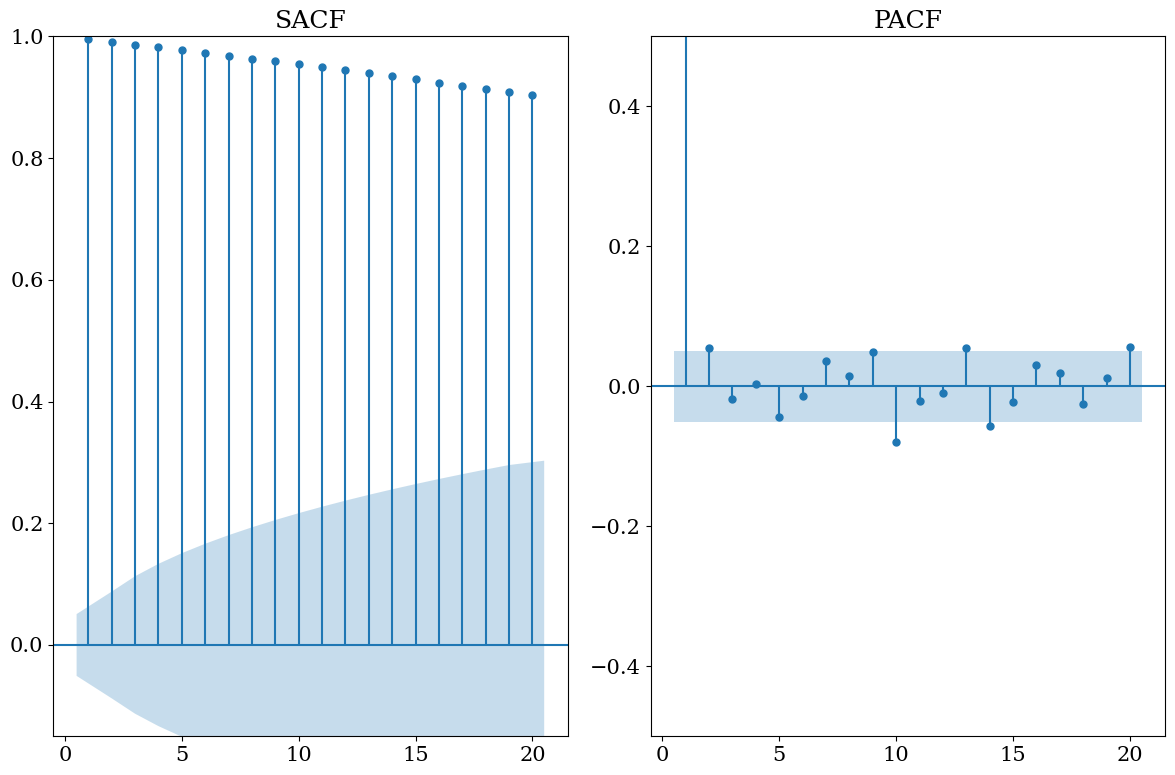

'surely not stationary, maybe it would be better to use log returns rather than prices.\nThe prices are clearly following a LRW'

In [ ]:
#Q1
fig, axes = plt.subplots(1,2,figsize=(12,8))
plot_acf(df_project['Bitcoin Price Index'], lags=20, ax=axes[0], zero=False)
axes[0].set_title("SACF")
axes[0].set_ylim([-0.15, 1])

plot_pacf(df_project['Bitcoin Price Index'], lags=20, method="OLS", ax=axes[1], zero=False)
axes[1].set_title("PACF")
axes[1].set_ylim([-0.5, 0.5])

plt.tight_layout()
plt.show()

'''surely not stationary, maybe it would be better to use log returns rather than prices.
The prices are clearly following a LRW also not stationary as variance grows'''

In [9]:
acf_price_val, acf_price_confint, acf_price_qstat, acf_price_pval=acf(df_project['Bitcoin Price Index'], nlags=20, alpha=0.05,qstat=True)
pacf_price_val, pacf_price_confint=pacf(df_project['Bitcoin Price Index'], nlags=20,method="ols",alpha=0.05)

df_acf_pacf_qstat_price=pd.DataFrame({
    "Lag": np.arange(1,21),
    "ACF": acf_price_val[1:],
    "Lower CI ACF": acf_price_confint[1:,0],
    "Upper CI ACF": acf_price_confint[1:,1],
    "PACF": pacf_price_val[1:],
    "Lower CI PACF": pacf_price_confint[1:,0],
    "Upper CI PACF": pacf_price_confint[1:,1],
    "Q-Stat": acf_price_qstat,
    "P-Value": acf_price_pval,
})
df_acf_pacf_qstat_price.set_index("Lag", inplace=True)
df_acf_pacf_qstat_price
df_acf_pacf_qstat_price

,ACF,Lower CI ACF,Upper CI ACF,PACF,Lower CI PACF,Upper CI PACF,Q-Stat,P-Value
Lag,,,,,,,,
1,0.995313,0.944537,1.046088,0.999611,0.948835,1.050386,1479.038833,0.0
2,0.990975,0.903304,1.078647,0.054465,0.003689,0.105240,2946.200339,0.0
3,0.986421,0.873506,1.099337,-0.017512,-0.068288,0.033264,4400.885908,0.0
4,0.982056,0.848763,1.115350,0.003398,-0.047377,0.054174,5843.695520,0.0
5,0.977276,0.826478,1.128074,-0.043552,-0.094328,0.007223,7273.454851,0.0
6,0.972555,0.806227,1.138882,-0.013819,-0.064595,0.036957,8690.387193,0.0
7,0.967993,0.787599,1.148387,0.035448,-0.015327,0.086224,10095.006159,0.0
8,0.963477,0.770155,1.156799,0.014137,-0.036638,0.064913,11487.488301,0.0
9,0.959184,0.753855,1.164513,0.048956,-0.001820,0.099732,12868.519543,0.0


Q2

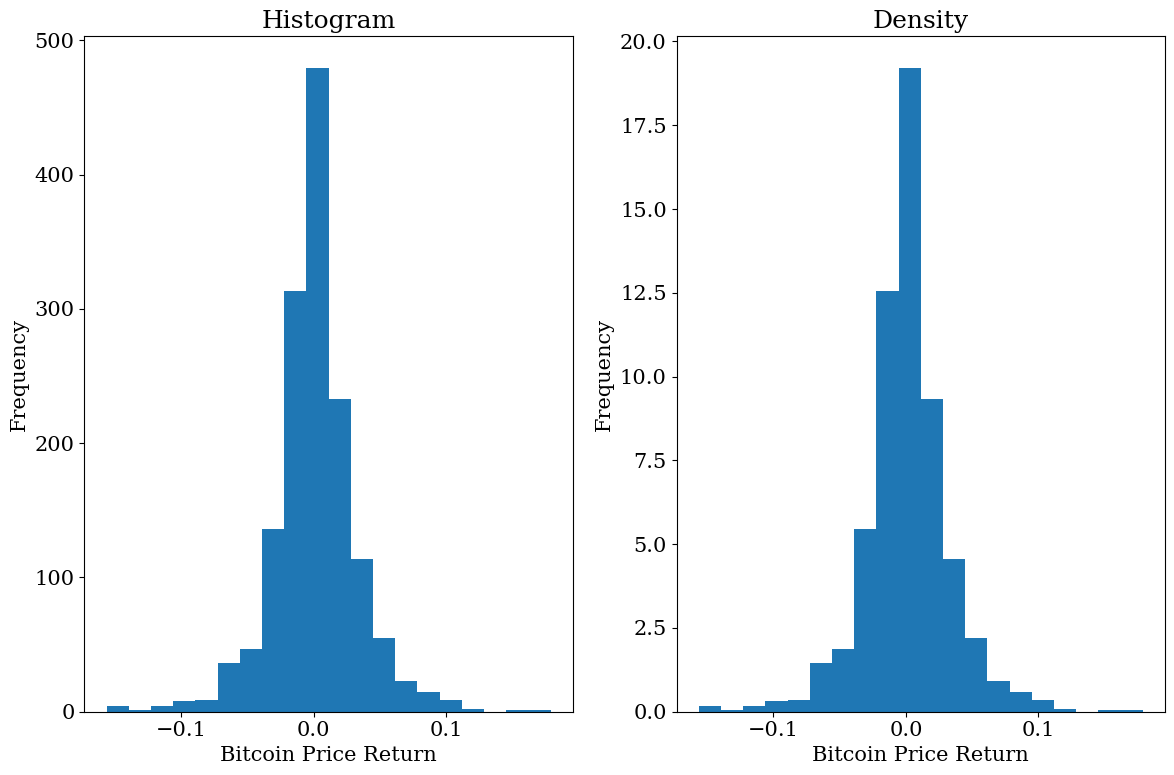

In [8]:
#Q2
fig, axes = plt.subplots(1,2,figsize=(12,8))
axes[0].hist(df_project['Bitcoin Price Return'], bins=20, density=False)
axes[0].set_title("Histogram")
axes[0].set_xlabel("Bitcoin Price Return")
axes[0].set_ylabel("Frequency")
axes[1].hist(df_project['Bitcoin Price Return'], bins=20, density=True)
axes[1].set_title("Density")
axes[1].set_xlabel("Bitcoin Price Return")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.xlabel("Bitcoin Price Return")
plt.show()

In [12]:
sum_stats=df_project["Bitcoin Price Return"].describe()

skewness=df_project["Bitcoin Price Return"].skew()
kurtosis=df_project["Bitcoin Price Return"].kurtosis()
jb_stat, jb_pval=jarque_bera(df_project["Bitcoin Price Return"])

stats_df=pd.DataFrame(df_project["Bitcoin Price Return"]).T

sum_stats['Skewness'] = skewness
sum_stats['Kurtosis'] = kurtosis
sum_stats['Jarque-Bera Stat'] = jb_stat
sum_stats['Jarque-Bera p-value'] = jb_pval

sum_stats
''' JB p val is very small, meaning normality does not really hold, furthermore we have a
slight left skew and a sightly high kurtosis indicating fatter tails'''

,Bitcoin Price Return
count,1.490000e+03
mean,9.657425e-04
std,3.182549e-02
min,-1.563000e-01
25%,-1.338479e-02
50%,-1.323777e-04
75%,1.540607e-02
max,1.786848e-01
Skewness,-2.429155e-02
Kurtosis,3.581938e+00


Q3

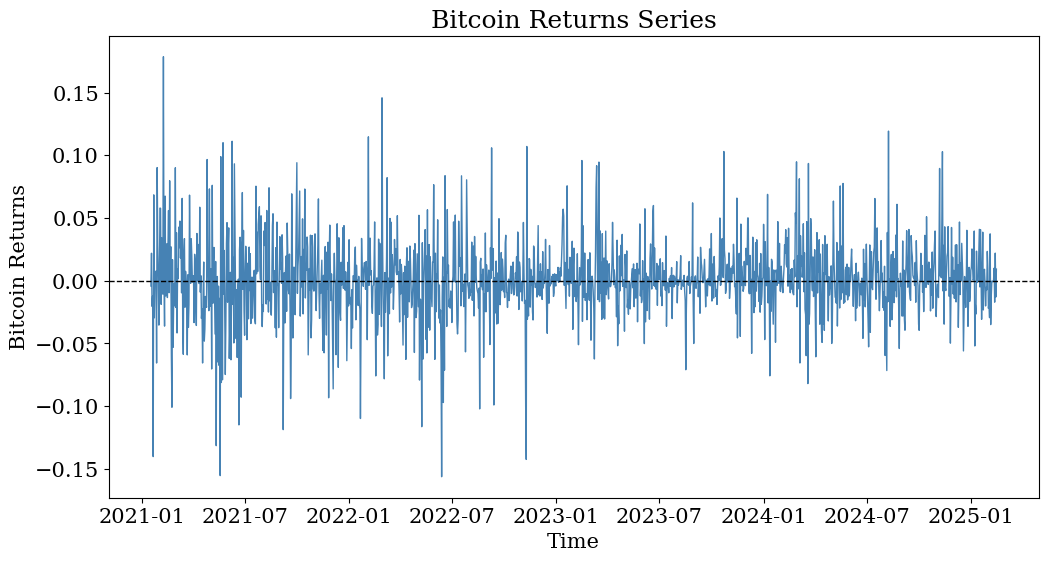

'return seems a white noise, but in some point there appears to be some walks'

In [14]:
#Q3
plt.figure(figsize=(12, 6))
plt.plot(df_project["Bitcoin Price Return"], color='steelblue', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Bitcoin Returns')
plt.title('Bitcoin Returns Series')
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
plt.show()

'''return seems a white noise, but in some point there appears to be some walks'''

Q4

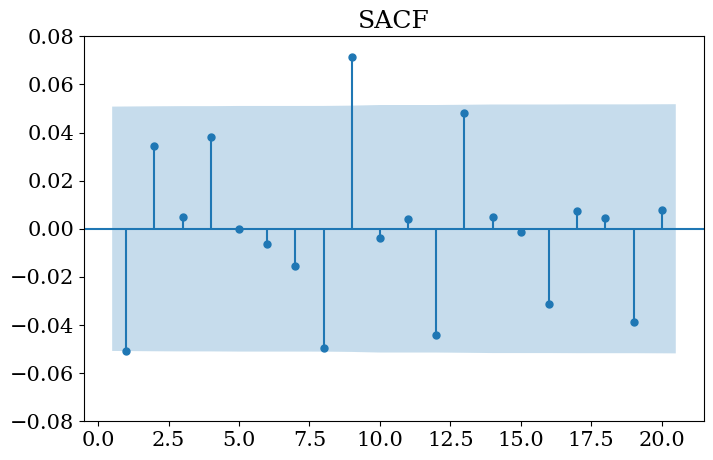

In [22]:
#Q4
fig, ax = plt.subplots(figsize=(8,5))
plot_acf(df_project['Bitcoin Price Return'], lags=20, zero=False, ax=ax)

ax.set_title("SACF")
ax.set_ylim([-0.08, 0.08])

plt.show()

In [24]:
acf_ret_val, acf_ret_confint, acf_ret_qstat, acf_ret_pval=acf(df_project['Bitcoin Price Return'], nlags=20, alpha=0.05,qstat=True)
pacf_ret_val, pacf_ret_confint=pacf(df_project['Bitcoin Price Return'], nlags=20,method="ols",alpha=0.05)

df_acf_pacf_qstat_ret=pd.DataFrame({
    "Lag": np.arange(1,21),
    "ACF": acf_ret_val[1:],
    "Lower CI ACF": acf_ret_confint[1:,0],
    "Upper CI ACF": acf_ret_confint[1:,1],
    "Q-Stat": acf_ret_qstat,
    "P-Value": acf_ret_pval,
})
df_acf_pacf_qstat_ret.set_index("Lag", inplace=True)
df_acf_pacf_qstat_ret
df_acf_pacf_qstat_ret

,ACF,Lower CI ACF,Upper CI ACF,Q-Stat,P-Value
Lag,,,,,
1,-0.050804,-0.101580,-0.000029,3.853581,0.049640
2,0.034593,-0.016313,0.085499,5.641421,0.059564
3,0.005079,-0.045888,0.056046,5.679984,0.128261
4,0.038000,-0.012968,0.088968,7.840232,0.097609
5,-0.000284,-0.051326,0.050757,7.840353,0.165256
6,-0.006262,-0.057303,0.044779,7.899096,0.245589
7,-0.015370,-0.066413,0.035674,8.253217,0.310796
8,-0.049673,-0.100729,0.001382,11.954506,0.153245
9,0.071569,0.020389,0.122749,19.643127,0.020247


Q5

In [26]:
#Q5
df_CER = df_project.copy()
X = np.ones((len(df_CER['Bitcoin Price Return']), 1))
y = df_CER["Bitcoin Price Return"]
model = sm.OLS(y, X)
results_sm = model.fit()
print(results_sm.summary())

                             OLS Regression Results                             
Dep. Variable:     Bitcoin Price Return   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Wed, 19 Mar 2025   Prob (F-statistic):                nan
Time:                          16:17:21   Log-Likelihood:                 3023.0
No. Observations:                  1490   AIC:                            -6044.
Df Residuals:                      1489   BIC:                            -6039.
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001

In [ ]:
#to do Q6-7-8-9, what should we fit? I try to fit up

Q6, various trial

In [37]:
#MA(1)
model = sm.tsa.statespace.SARIMAX(
    df_project['Bitcoin Price Return'].values,
    order=(0, 0, 1),
    trend='c',
    enforce_stationarity=False,#MA stationary by default
    enforce_invertibility=False
)

results_MA_1 = model.fit()
print(results_MA_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1490
Model:               SARIMAX(0, 0, 1)   Log Likelihood                3019.984
Date:                Wed, 19 Mar 2025   AIC                          -6033.967
Time:                        16:27:14   BIC                          -6018.052
Sample:                             0   HQIC                         -6028.036
                               - 1490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.001      1.190      0.234      -0.001       0.003
ma.L1         -0.0491      0.021     -2.311      0.021      -0.091      -0.007
sigma2         0.0010   2.22e-05     45.534      0.0

In [38]:
#AR1
model = sm.tsa.statespace.SARIMAX(
    df_project['Bitcoin Price Return'].values,
    order=(1, 0, 0),
    trend='c',
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_AR_1 = model.fit()
print(results_AR_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1490
Model:               SARIMAX(1, 0, 0)   Log Likelihood                3022.447
Date:                Wed, 19 Mar 2025   AIC                          -6038.895
Time:                        16:27:27   BIC                          -6022.977
Sample:                             0   HQIC                         -6032.963
                               - 1490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.001      1.222      0.222      -0.001       0.003
ar.L1         -0.0508      0.021     -2.372      0.018      -0.093      -0.009
sigma2         0.0010   2.22e-05     45.589      0.0

In [53]:
#ARMA(1,1)
model = sm.tsa.statespace.SARIMAX(
    df_project['Bitcoin Price Return'].values,
    order=(1, 0, 1),
    trend='c',
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_ARMA_1_1 = model.fit()
print(results_ARMA_1_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1490
Model:               SARIMAX(1, 0, 1)   Log Likelihood                3024.828
Date:                Wed, 19 Mar 2025   AIC                          -6041.657
Time:                        16:35:41   BIC                          -6020.436
Sample:                             0   HQIC                         -6033.748
                               - 1490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0019      0.002      1.157      0.247      -0.001       0.005
ar.L1         -0.9838      0.004   -222.735      0.000      -0.992      -0.975
ma.L1          1.0072      0.005    187.950      0.0

In [52]:
#AR(2)
model = sm.tsa.statespace.SARIMAX(
    df_project['Bitcoin Price Return'].values,
    order=(2, 0, 0),
    trend='c',
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_AR_2 = model.fit()
print(results_AR_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1490
Model:               SARIMAX(2, 0, 0)   Log Likelihood                3020.897
Date:                Wed, 19 Mar 2025   AIC                          -6033.795
Time:                        16:35:38   BIC                          -6012.574
Sample:                             0   HQIC                         -6025.886
                               - 1490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.001      1.159      0.246      -0.001       0.003
ar.L1         -0.0491      0.021     -2.293      0.022      -0.091      -0.007
ar.L2          0.0321      0.024      1.337      0.1

In [54]:
#MA(2)
model = sm.tsa.statespace.SARIMAX(
    df_project['Bitcoin Price Return'].values,
    order=(0, 0, 2),
    trend='c',
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_MA_2 = model.fit()
print(results_MA_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1490
Model:               SARIMAX(0, 0, 2)   Log Likelihood                3018.502
Date:                Wed, 19 Mar 2025   AIC                          -6029.004
Time:                        16:35:48   BIC                          -6007.786
Sample:                             0   HQIC                         -6021.096
                               - 1490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.001      1.162      0.245      -0.001       0.003
ma.L1         -0.0498      0.022     -2.314      0.021      -0.092      -0.008
ma.L2          0.0316      0.024      1.301      0.1

In [55]:
#ARMA(2,1)
model = sm.tsa.statespace.SARIMAX(
    df_project['Bitcoin Price Return'].values,
    order=(2, 0, 1),
    trend='c',
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_ARMA_2_1 = model.fit()
print(results_ARMA_2_1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1490
Model:               SARIMAX(2, 0, 1)   Log Likelihood                3020.893
Date:                Wed, 19 Mar 2025   AIC                          -6031.785
Time:                        16:35:50   BIC                          -6005.259
Sample:                             0   HQIC                         -6021.899
                               - 1490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.001      0.856      0.392      -0.001       0.002
ar.L1          0.2055      0.563      0.365      0.715      -0.898       1.309
ar.L2          0.0469      0.031      1.491      0.1

In [56]:
#ARMA(2,2)
model = sm.tsa.statespace.SARIMAX(
    df_project['Bitcoin Price Return'].values,
    order=(2, 0, 2),
    trend='c',
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_ARMA_2_2 = model.fit()
print(results_ARMA_2_2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1490
Model:               SARIMAX(2, 0, 2)   Log Likelihood                3019.750
Date:                Wed, 19 Mar 2025   AIC                          -6027.499
Time:                        16:35:54   BIC                          -5995.672
Sample:                             0   HQIC                         -6015.637
                               - 1490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.000      1.082      0.279      -0.000       0.001
ar.L1          0.3097      0.359      0.863      0.388      -0.393       1.013
ar.L2          0.1885      0.245      0.769      0.4

Q7

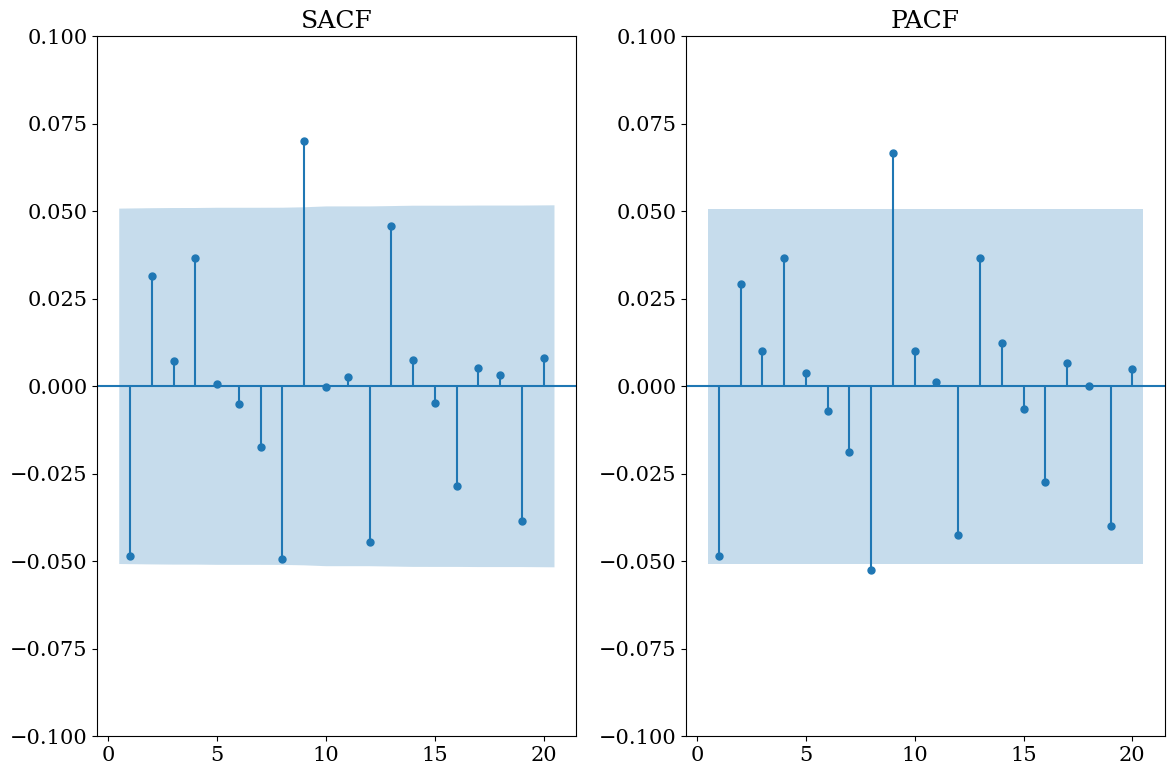

In [61]:
#Q7
residuals = results_ARMA_1_1.resid
fig, axes = plt.subplots(1,2,figsize=(12,8))
plot_acf(residuals, lags=20, ax=axes[0], zero=False)
axes[0].set_title("SACF")
axes[0].set_ylim([-0.1, 0.1])

plot_pacf(residuals, lags=20, method="OLS", ax=axes[1], zero=False)
axes[1].set_title("PACF")
axes[1].set_ylim([-0.1, 0.1])

plt.tight_layout()
plt.show()

i see no clear trend in residuals so I would confirm that the model is specified ok no?

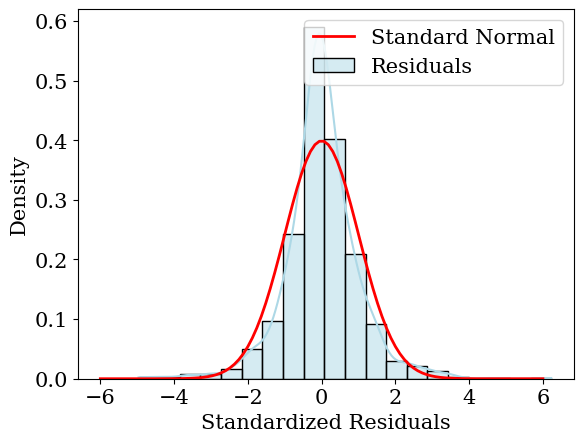

In [58]:
#Q7
df_residuals = pd.DataFrame(residuals)
df_residuals.head()
df_residuals["resid"]=df_residuals[0]
df_residuals.drop(columns=[0], inplace=True)
std_dev=df_residuals["resid"].std()
errmean=df_residuals["resid"].mean()
df_residuals["std"]=(df_residuals["resid"]-errmean)/std_dev
sns.histplot(df_residuals["std"], bins=20, kde=True, stat="density", label="Residuals", color="lightblue", edgecolor="black")

# Overlay standard normal distribution
x = np.linspace(-6, 6, 100)
plt.plot(x, stats.norm.pdf(x), label="Standard Normal", color="red", linewidth=2)

# Labels & legend
plt.xlabel("Standardized Residuals")
plt.ylabel("Density")
plt.legend()
plt.show()

Q8

In [59]:
#JB test Q8
jb_stat, jb_p_value = jarque_bera(residuals)
print(f"the JB statistic is: ",jb_stat,",the JB p val is: ",jb_p_value)

the JB statistic is:  908.0576845894794 ,the JB p val is:  6.573235112526428e-198


normality fails, maybe the model is not veery good :)

Q9

In [60]:
df_results=pd.DataFrame({
    "AIC CER":results_sm.aic,
    "AIC ARMA(1,1)":results_ARMA_1_1.aic,
    "BIC CER":results_sm.bic,
    "BIC ARMA(1,1)":results_ARMA_1_1.bic,
    "HQIC ARMA(1,1)":results_ARMA_1_1.hqic
}, index=[0])
df_results
'''the regression on a constant is better'''

,AIC CER,"AIC ARMA(1,1)",BIC CER,"BIC ARMA(1,1)","HQIC ARMA(1,1)"
0,-6044.077334,-6041.656936,-6038.770802,-6020.436183,-6033.748258
